#Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import sklearn as sk

#DataSet


*  Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo





In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#datosor = pd.read_csv('/content/bank-additional-full.csv', sep=';')

datosor = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', sep=';')
datosor.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#Estadisticas Variables Nominales


In [ ]:
def estadisticas(df,columna):

    estadisticas = {
        "Estadísticas": [
            "Media", "Mediana", "Desviación estándar", "Varianza",
            "Mínimo", "Máximo", "Rango", "Asimetría", "Curtosis"
        ],
        "Valor": [
            df[columna].mean(),
            df[columna].median(),
            df[columna].std(),
            df[columna].var(),
            df[columna].min(),
            df[columna].max(),
            df[columna].max() - df[columna].min(),
            df[columna].skew(),
            df[columna].kurt()
        ]
    }

    return pd.DataFrame(estadisticas)


##Age


* Los datos presentan valores relativamente bajos y distribución moderadamente sesgada.




In [ ]:
estadisticas(datosor,'age')

,Estadísticas,Valor
0,Media,40.024060
1,Mediana,38.000000
2,Desviación estándar,10.421250
3,Varianza,108.602451
4,Mínimo,17.000000
5,Máximo,98.000000
6,Rango,81.000000
7,Asimetría,0.784697
8,Curtosis,0.791312


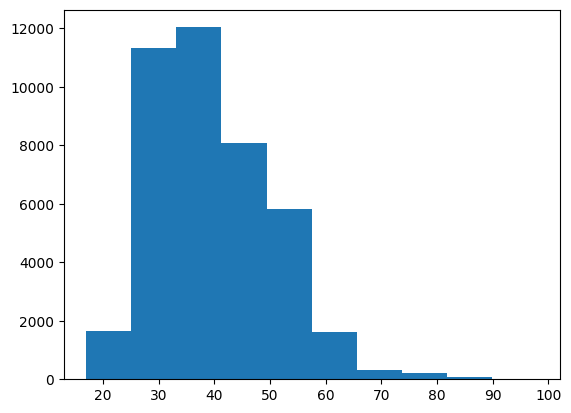

In [ ]:
plt.hist(datosor['age'])
plt.show()

##Last contact duration, in seconds.


*   Los datos presentan valores significativamente más altos y una distribución muy asimétrica.




In [ ]:
estadisticas(datosor,'duration')

,Estadísticas,Valor
0,Media,258.285010
1,Mediana,180.000000
2,Desviación estándar,259.279249
3,Varianza,67225.728877
4,Mínimo,0.000000
5,Máximo,4918.000000
6,Rango,4918.000000
7,Asimetría,3.263141
8,Curtosis,20.247938


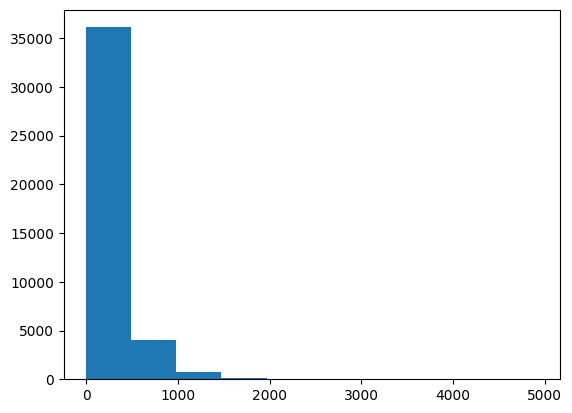

In [ ]:
plt.hist(datosor['duration'])
plt.show()

##Number of contacts performed during this campaign and for this client.


* Los datos presnetan valores relativamente bajos y una distribución fuertemente sesgada a la derecha.





In [ ]:
estadisticas(datosor,'campaign')

,Estadísticas,Valor
0,Media,2.567593
1,Mediana,2.000000
2,Desviación estándar,2.770014
3,Varianza,7.672975
4,Mínimo,1.000000
5,Máximo,56.000000
6,Rango,55.000000
7,Asimetría,4.762507
8,Curtosis,36.979795


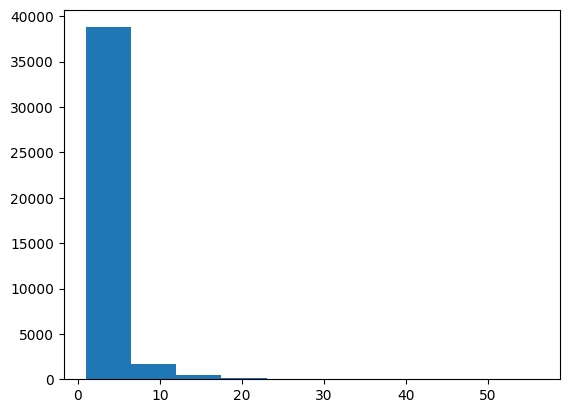

In [ ]:
plt.hist(datosor['campaign'])
plt.show()

##Number of days that passed by after the client was last contacted from a previous campaign.


*  Los datos presentan valores altos y una distribución fuertemente sesgada a la izquierda.




In [ ]:
estadisticas(datosor,'pdays')

,Estadísticas,Valor
0,Media,962.475454
1,Mediana,999.000000
2,Desviación estándar,186.910907
3,Varianza,34935.687284
4,Mínimo,0.000000
5,Máximo,999.000000
6,Rango,999.000000
7,Asimetría,-4.922190
8,Curtosis,22.229463


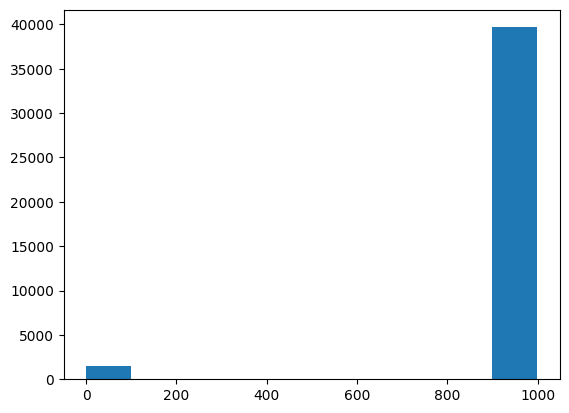

In [ ]:
plt.hist(datosor['pdays'])
plt.show()

##Number of contacts performed before this campaign and for this client.

* Los datos presentan valores relativamente bajos y distribución moderadamente sesgada.




In [ ]:
estadisticas(datosor,'previous')

,Estadísticas,Valor
0,Media,0.172963
1,Mediana,0.000000
2,Desviación estándar,0.494901
3,Varianza,0.244927
4,Mínimo,0.000000
5,Máximo,7.000000
6,Rango,7.000000
7,Asimetría,3.832042
8,Curtosis,20.108816


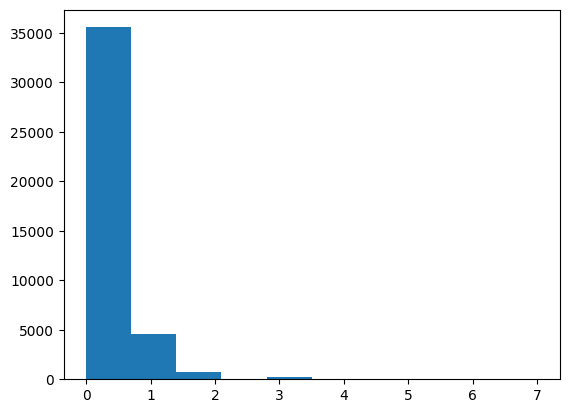

In [ ]:
plt.hist(datosor['previous'])
plt.show()

##Employment variation rate



In [ ]:
estadisticas(datosor,'emp.var.rate')

,Estadísticas,Valor
0,Media,0.081886
1,Mediana,1.100000
2,Desviación estándar,1.570960
3,Varianza,2.467915
4,Mínimo,-3.400000
5,Máximo,1.400000
6,Rango,4.800000
7,Asimetría,-0.724096
8,Curtosis,-1.062632


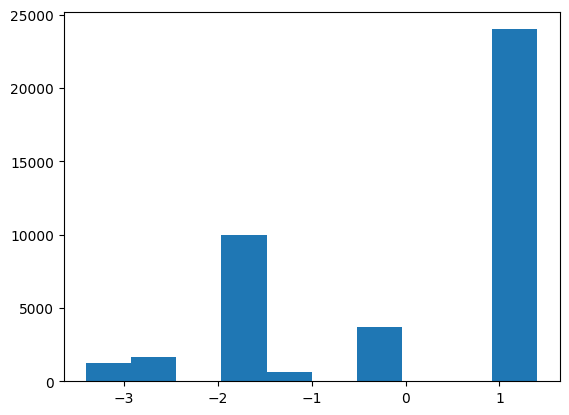

In [ ]:
plt.hist(datosor['emp.var.rate'])
plt.show()

##Consumer price index


In [ ]:
estadisticas(datosor,'cons.price.idx')

,Estadísticas,Valor
0,Media,93.575664
1,Mediana,93.749000
2,Desviación estándar,0.578840
3,Varianza,0.335056
4,Mínimo,92.201000
5,Máximo,94.767000
6,Rango,2.566000
7,Asimetría,-0.230888
8,Curtosis,-0.829809


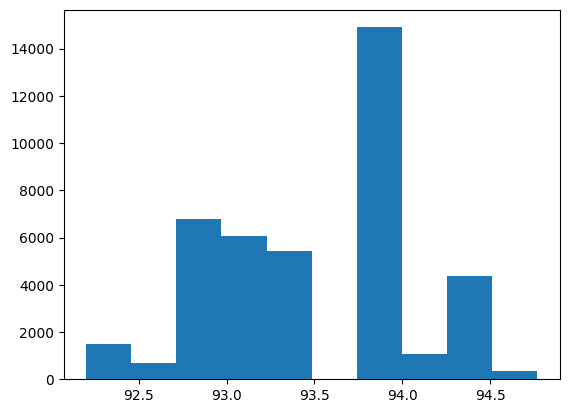

In [ ]:
plt.hist(datosor['cons.price.idx'])
plt.show()

##Cosumer confidence index

In [ ]:
estadisticas(datosor,'cons.conf.idx')

,Estadísticas,Valor
0,Media,-40.502600
1,Mediana,-41.800000
2,Desviación estándar,4.628198
3,Varianza,21.420215
4,Mínimo,-50.800000
5,Máximo,-26.900000
6,Rango,23.900000
7,Asimetría,0.303180
8,Curtosis,-0.358558


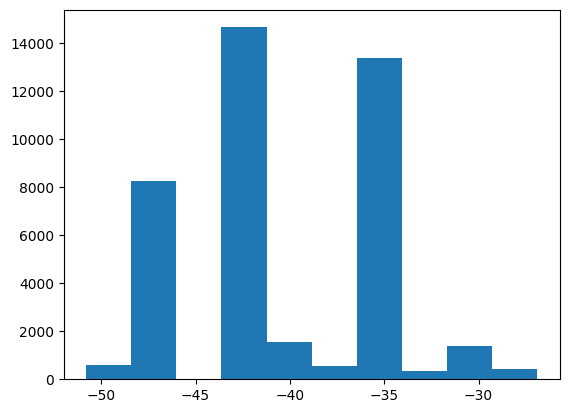

In [ ]:
plt.hist(datosor['cons.conf.idx'])
plt.show()

##Euribor a 3 meses


In [ ]:
estadisticas(datosor,'euribor3m')

,Estadísticas,Valor
0,Media,3.621291
1,Mediana,4.857000
2,Desviación estándar,1.734447
3,Varianza,3.008308
4,Mínimo,0.634000
5,Máximo,5.045000
6,Rango,4.411000
7,Asimetría,-0.709188
8,Curtosis,-1.406803


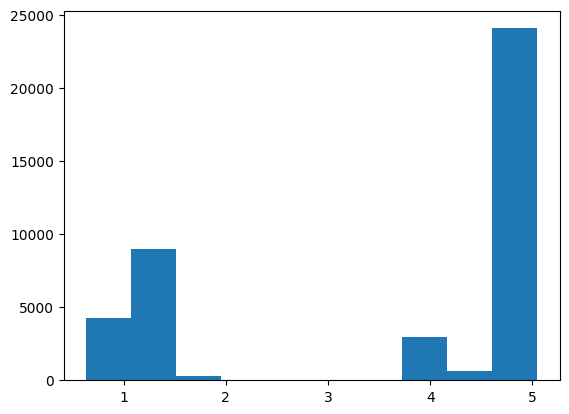

In [ ]:
plt.hist(datosor['euribor3m'])
plt.show()

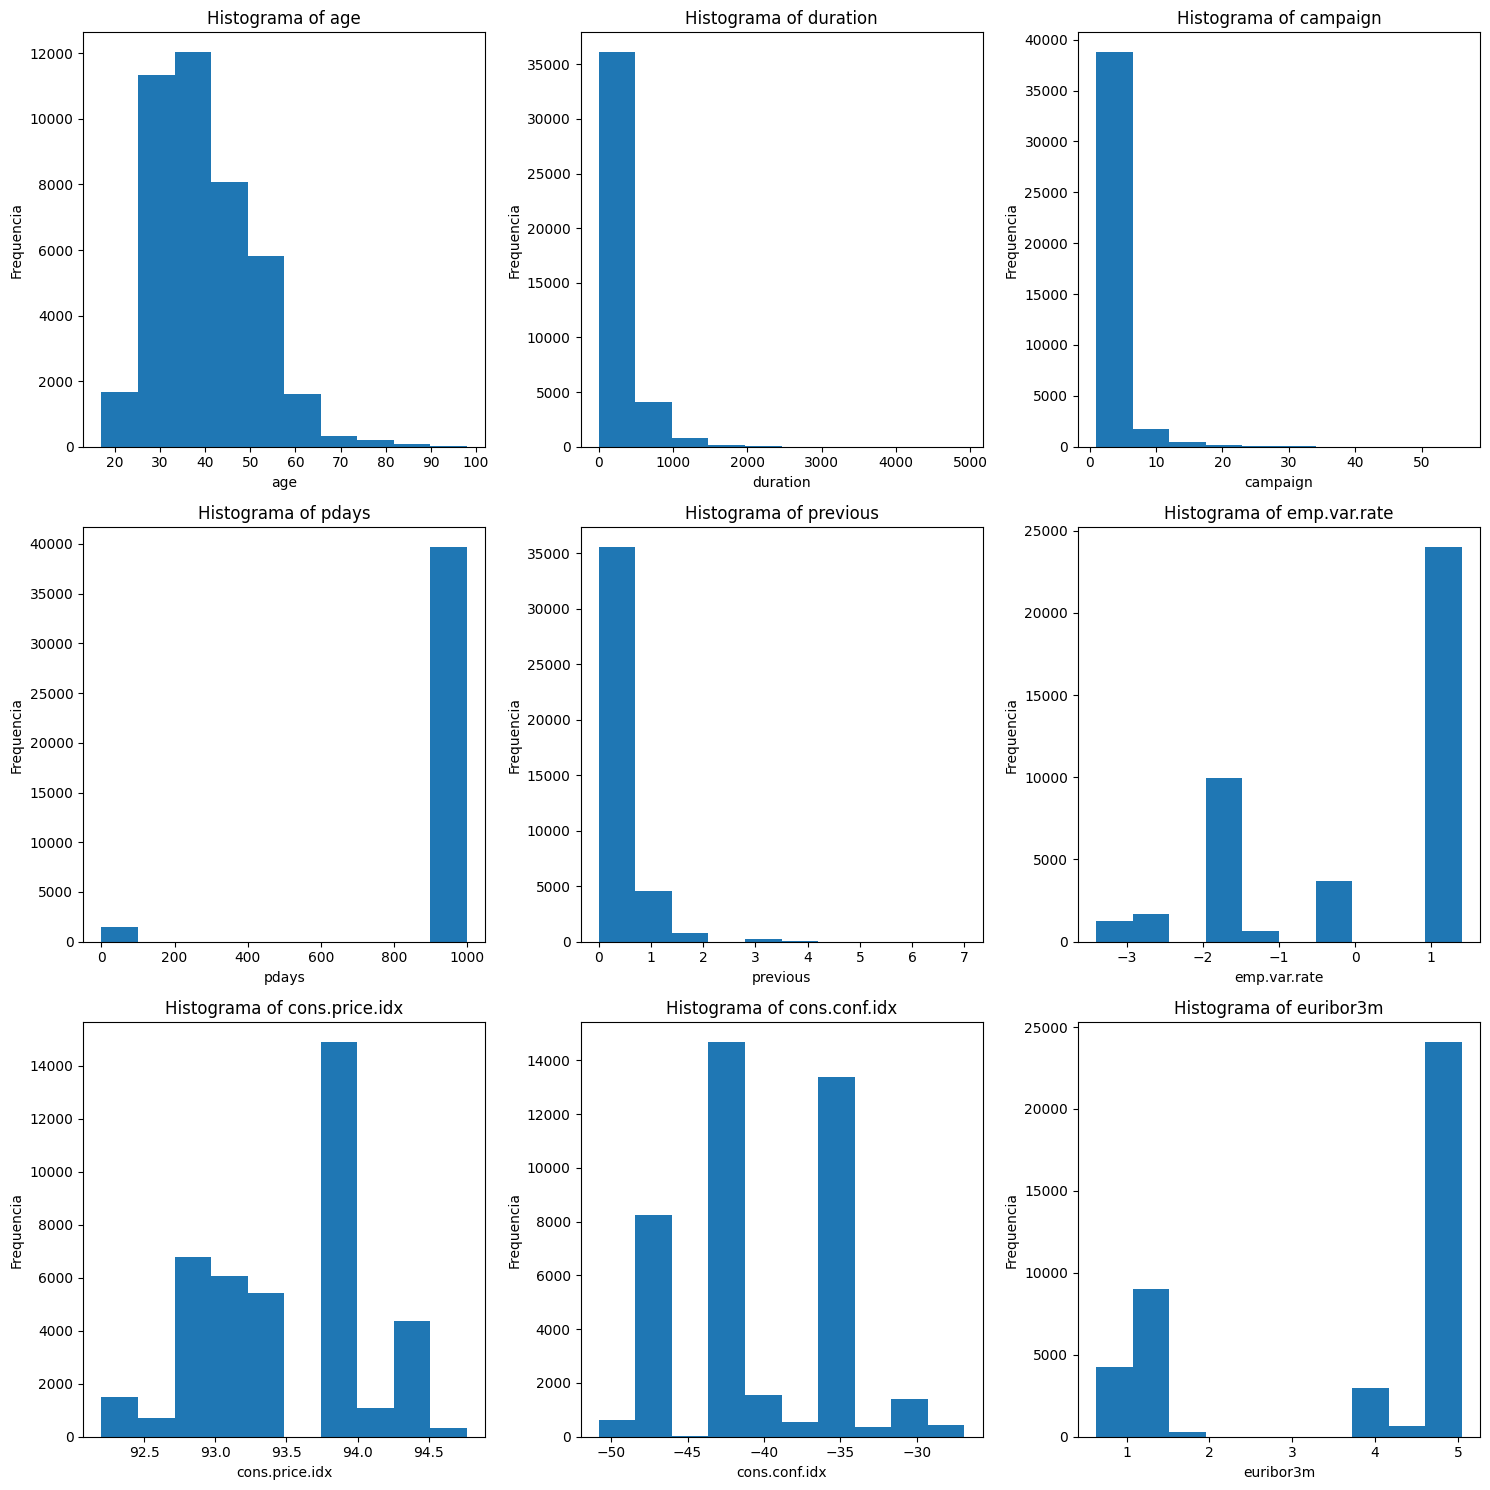

In [ ]:
# prompt: DAME UN CUADRO CON LOS HISTOGRAMAS DE LAS VARIABLES NUEMRICAS

import matplotlib.pyplot as plt

# Assuming 'datosor' DataFrame is already loaded as in your provided code

numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    axes[i].hist(datosor[col])
    axes[i].set_title(f'Histograma of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequencia')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: DAME UNA TABLA CON LAS ESTADISTICAS DE LAS VARIBALES NUMERICAS EN UN NUNICO DATAFRAME

import pandas as pd

def estadisticas(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    stats_df = pd.DataFrame()
    for col in numeric_cols:
        stats = {
            "Variable": col,
            "Media": df[col].mean(),
            "Mediana": df[col].median(),
            "Desviación estándar": df[col].std(),
            "Varianza": df[col].var(),
            "Mínimo": df[col].min(),
            "Máximo": df[col].max(),
            "Rango": df[col].max() - df[col].min(),
            "Asimetría": df[col].skew(),
            "Curtosis": df[col].kurt()
        }
        stats_df = pd.concat([stats_df, pd.DataFrame([stats])], ignore_index=True)
    return stats_df

# Assuming 'datosor' DataFrame is already defined from the previous code
estadisticas_df = estadisticas(datosor)
estadisticas_df


,Variable,Media,Mediana,Desviación estándar,Varianza,Mínimo,Máximo,Rango,Asimetría,Curtosis
0,age,40.024060,38.000,10.421250,108.602451,17.000,98.000,81.000,0.784697,0.791312
1,duration,258.285010,180.000,259.279249,67225.728877,0.000,4918.000,4918.000,3.263141,20.247938
2,campaign,2.567593,2.000,2.770014,7.672975,1.000,56.000,55.000,4.762507,36.979795
3,pdays,962.475454,999.000,186.910907,34935.687284,0.000,999.000,999.000,-4.922190,22.229463
4,previous,0.172963,0.000,0.494901,0.244927,0.000,7.000,7.000,3.832042,20.108816
5,emp.var.rate,0.081886,1.100,1.570960,2.467915,-3.400,1.400,4.800,-0.724096,-1.062632
6,cons.price.idx,93.575664,93.749,0.578840,0.335056,92.201,94.767,2.566,-0.230888,-0.829809
7,cons.conf.idx,-40.502600,-41.800,4.628198,21.420215,-50.800,-26.900,23.900,0.303180,-0.358558
8,euribor3m,3.621291,4.857,1.734447,3.008308,0.634,5.045,4.411,-0.709188,-1.406803
9,nr.employed,5167.035911,5191.000,72.251528,5220.283250,4963.600,5228.100,264.500,-1.044262,-0.003760


#Clasificaion Variables

In [ ]:
# prompt: Dame un codigo para clasificar las variables numericas y categoricas y damelas en una tabla

import pandas as pd
# Clasificación de variables numéricas y categóricas

# Obtener información sobre los tipos de datos de cada columna
data_types = datosor.dtypes

# Crear listas para almacenar las variables numéricas y categóricas
numerical_vars = []
categorical_vars = []

# Iterar sobre las columnas y clasificarlas
for column, dtype in data_types.items():
  if dtype in ['int64', 'float64']:
    numerical_vars.append(column)
  else:
    categorical_vars.append(column)

# Crear un DataFrame para mostrar la clasificación
classification_df = pd.DataFrame({
    'Variable': numerical_vars + categorical_vars,
    'Tipo': ['Numérica'] * len(numerical_vars) + ['Categórica'] * len(categorical_vars)
})

# Mostrar la tabla
classification_df


,Variable,Tipo
0,age,Numérica
1,duration,Numérica
2,campaign,Numérica
3,pdays,Numérica
4,previous,Numérica
5,emp.var.rate,Numérica
6,cons.price.idx,Numérica
7,cons.conf.idx,Numérica
8,euribor3m,Numérica
9,nr.employed,Numérica


In [ ]:
# prompt: Dame un codigo para clasificar las variables numericas y categoricas y damelas en diccionarios

import numpy as np
import pandas as pd

# Assuming 'datosor' DataFrame is already loaded as in your provided code

# Identify numerical and categorical features
numerical_features = datosor.select_dtypes(include=np.number).columns.tolist()
categorical_features = datosor.select_dtypes(exclude=np.number).columns.tolist()

# Create dictionaries
numerical_dict = {'numerical_features': numerical_features}
categorical_dict = {'categorical_features': categorical_features}

print(numerical_dict)
categorical_dict


{'numerical_features': ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']}


{'categorical_features': ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y']}

# Limpieza de Datos


##Variables categoricas


In [ ]:
#Prorcentaje de datos nulos.
datosor.isna().mean()*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0



###Job

In [ ]:
datosor.groupby('job').size()

,0
job,
admin.,10422
blue-collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self-employed,1421
services,3969
student,875


In [ ]:
datosor['job']= datosor['job'].str.replace('-','_')
datosor['job']=datosor['job'].str.replace('.','')
datosor['job']= datosor['job'].str.strip()
datosor.groupby('job').size()

,0
job,
admin,10422
blue_collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self_employed,1421
services,3969
student,875


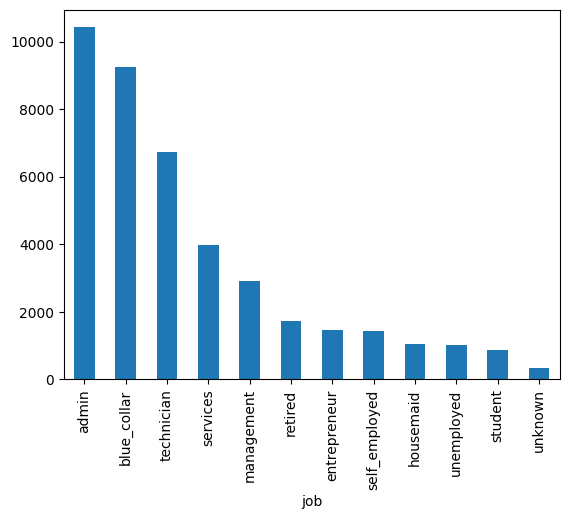

In [ ]:
frecuencias_job = datosor['job'].value_counts()
frecuencias_job.plot(kind='bar')
plt.show()

###Education

In [ ]:
datosor.groupby('education').size()

,0
education,
basic.4y,4176
basic.6y,2292
basic.9y,6045
high.school,9515
illiterate,18
professional.course,5243
university.degree,12168
unknown,1731


In [ ]:
datosor['education'] = datosor['education'].astype(str)
datosor['education'] = datosor['education'].str.strip()
datosor['education'] = datosor['education'].str.replace('.', '')
datosor['education_limpio'] = datosor['education'].apply(lambda x: 'basic' if x in ['basic4y', 'basic6y', 'basic9y'] else x)
datosor.groupby('education_limpio').size()





,0
education_limpio,
basic,12513
highschool,9515
illiterate,18
professionalcourse,5243
universitydegree,12168
unknown,1731


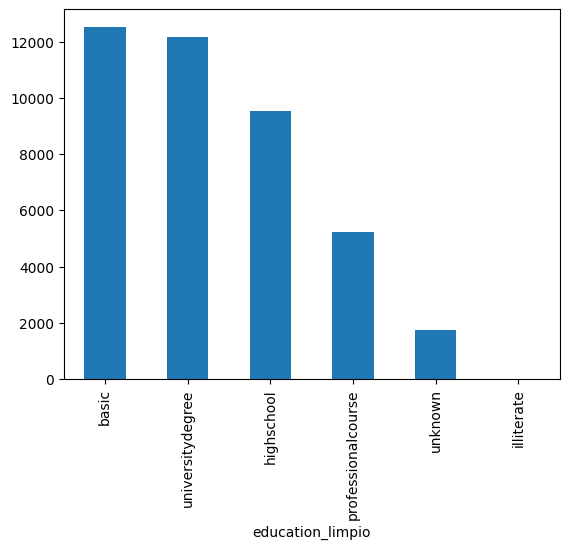

In [ ]:
datosor['education_limpio'] = datosor['education_limpio'].fillna('unknown')
datosor.drop('education', axis=1, inplace=True)
frecuencias_education_limpio = datosor['education_limpio'].value_counts()
frecuencias_education_limpio.plot(kind='bar')
plt.show()

In [ ]:
datosor.rename(columns={'education_limpio': 'education'}, inplace=True)

###Marital


In [ ]:
datosor.groupby('marital').size()

,0
marital,
divorced,4612
married,24928
single,11568
unknown,80


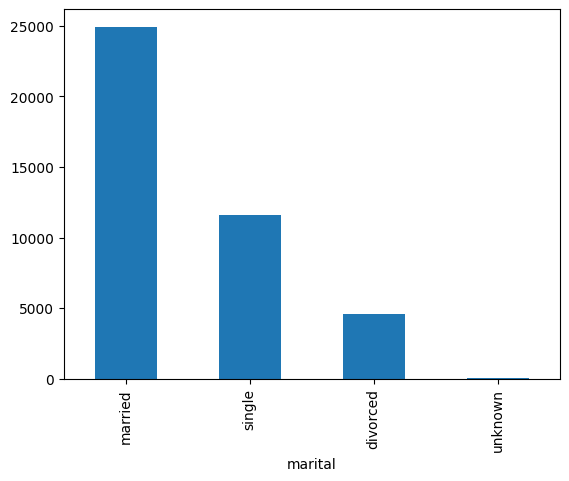

In [ ]:
frecuencias_marital = datosor['marital'].value_counts()
frecuencias_marital.plot(kind='bar')
plt.show()

###Default

In [ ]:
datosor.groupby('default').size()


,0
default,
no,32588
unknown,8597
yes,3


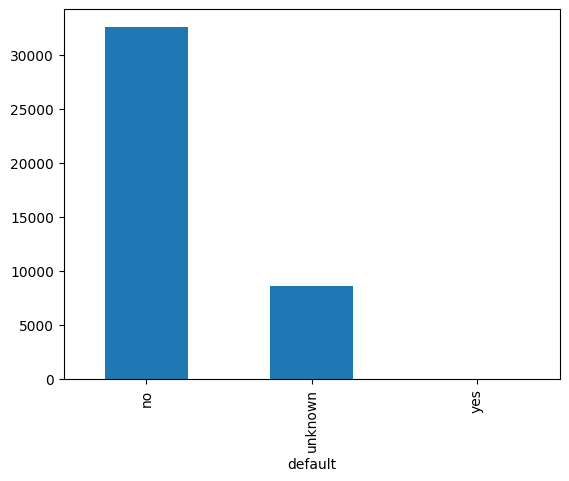

In [ ]:
frecuencias_default= datosor['default'].value_counts()
frecuencias_default.plot(kind='bar')
plt.show()

###Housing

In [ ]:
datosor.groupby('housing').size()

,0
housing,
no,18622
unknown,990
yes,21576


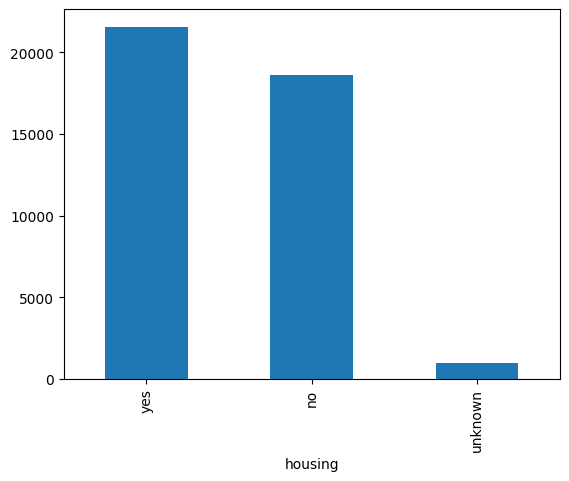

In [ ]:
frecuencias_housting = datosor['housing'].value_counts()
frecuencias_housting.plot(kind='bar')
plt.show()

###Loan

In [ ]:
datosor.groupby('loan').size()

,0
loan,
no,33950
unknown,990
yes,6248


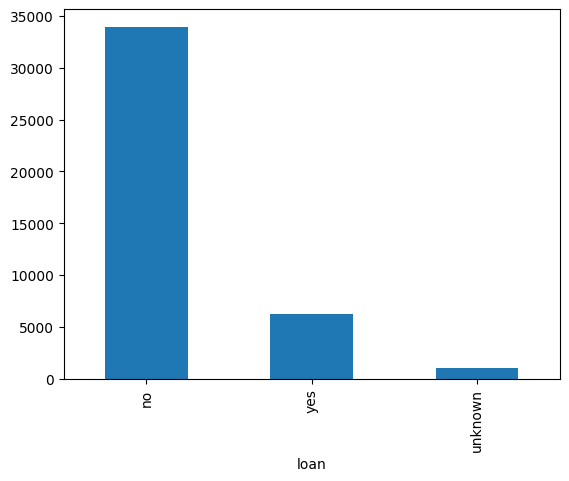

In [ ]:
frecuencias_loan = datosor['loan'].value_counts()
frecuencias_loan.plot(kind='bar')
plt.show()

###Contact  



In [ ]:
datosor.groupby('contact').size()

,0
contact,
cellular,26144
telephone,15044


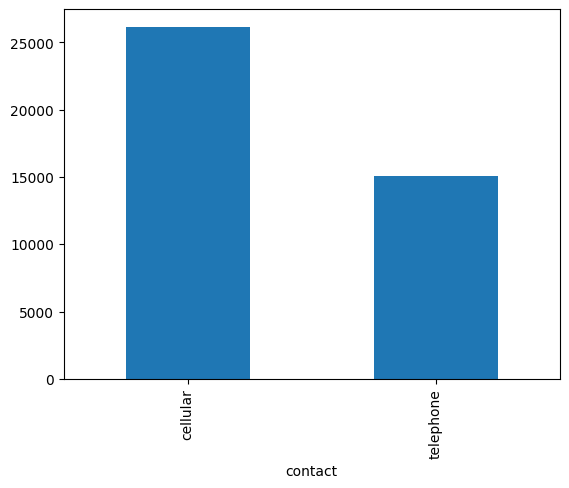

In [ ]:
frecuencias_contact = datosor['contact'].value_counts()
frecuencias_contact.plot(kind='bar')
plt.show()

###Month

In [ ]:
datosor.groupby('month').size()

,0
month,
apr,2632
aug,6178
dec,182
jul,7174
jun,5318
mar,546
may,13769
nov,4101
oct,718


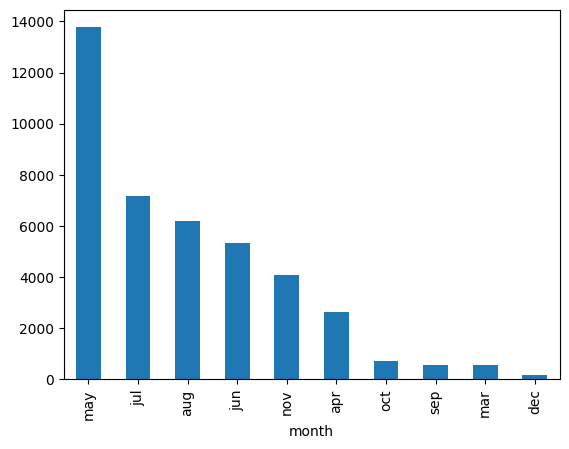

In [ ]:
frecuencias_month = datosor['month'].value_counts()
frecuencias_month.plot(kind='bar')
plt.show()

###Day of week

In [ ]:
datosor.groupby('day_of_week').size()

,0
day_of_week,
fri,7827
mon,8514
thu,8623
tue,8090
wed,8134


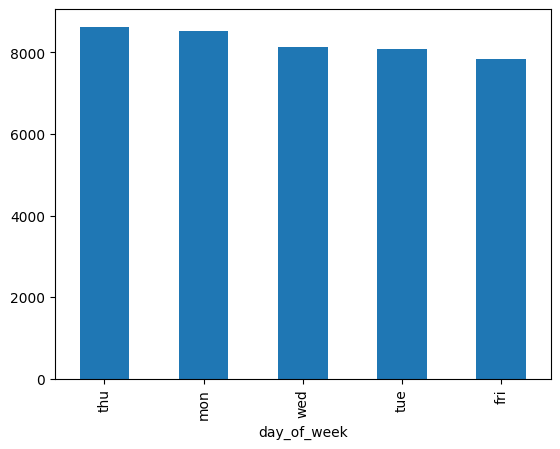

In [ ]:
frecuencias_day_of_week = datosor['day_of_week'].value_counts()
frecuencias_day_of_week.plot(kind='bar')
plt.show()

###Poutcome

In [ ]:
datosor.groupby('poutcome').size()


,0
poutcome,
failure,4252
nonexistent,35563
success,1373


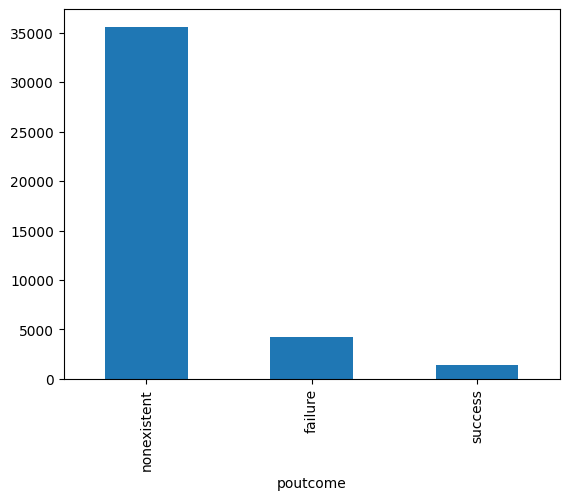

In [ ]:
frecuencias_poutcome = datosor['poutcome'].value_counts()
frecuencias_poutcome.plot(kind='bar')
plt.show()

###Y (contrato servicio)

In [ ]:
datosor.groupby('y').size()

,0
y,
no,36548
yes,4640


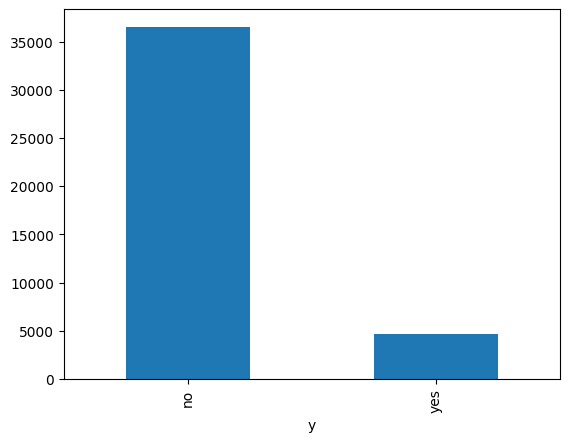

In [ ]:
frecuencias_y = datosor['y'].value_counts()
frecuencias_y.plot(kind='bar')
plt.show()

###Contacted

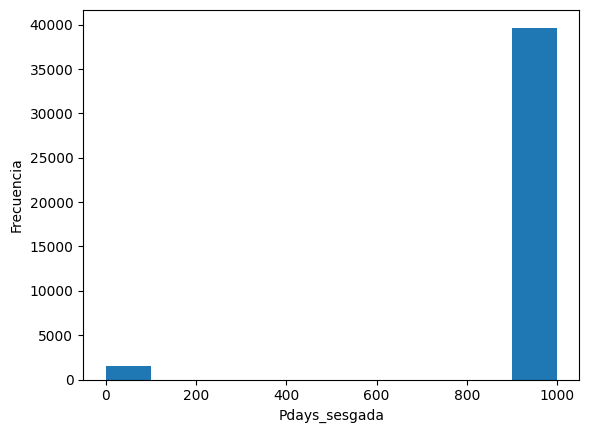

In [ ]:

plt.hist(datosor['pdays'])
plt.xlabel('Pdays_sesgada')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Function to categorize 'pdays'
def categorizar_pdays(valor):
    if valor == 999:
        return 'no'
    else:
        return 'yes'

# Apply the function and create the new column in 'datosor'
datosor['contacted'] = datosor['pdays'].apply(categorizar_pdays)



In [ ]:
datosor.groupby('contacted').size()


,0
contacted,
no,39673
yes,1515


In [ ]:
datosor.drop('pdays', axis=1, inplace=True)


In [ ]:
datosor.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,contacted
0,56,housemaid,married,no,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic,no
1,57,services,married,unknown,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,highschool,no
2,37,services,married,no,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,highschool,no
3,40,admin,married,no,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic,no
4,56,services,married,no,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,highschool,no


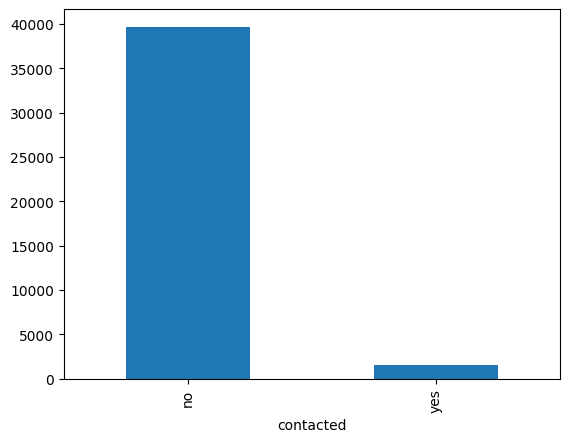

In [ ]:
frecuencias_contacted = datosor['contacted'].value_counts()
frecuencias_contacted.plot(kind='bar')
plt.show()

#Z-score_RIC


In [ ]:
for columnas in datosor.columns:
 print(columnas)

age
job
marital
default
housing
loan
contact
month
day_of_week
duration
campaign
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y
education
contacted


In [ ]:
def z_score(df, columna):
  df[columna+ 'z'] = (df[columna] - df[columna].mean())/df[columna].std()
  df_filtrado = df[df[columna + 'z'].abs()<2]
  return df_filtrado

In [ ]:
def outliers_RIC(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    RIC = Q3 - Q1
    cota_inferior = Q1 - 1.5 * RIC
    cota_superior = Q3 + 1.5 * RIC
    df_filtrado = df[(df[columna] >= cota_inferior) & (df[columna] <= cota_superior)]
    return df_filtrado


###Age

In [ ]:
datos_filtrados_age = datosor[(datosor['age']>0) & (datosor['age']<100) == True]

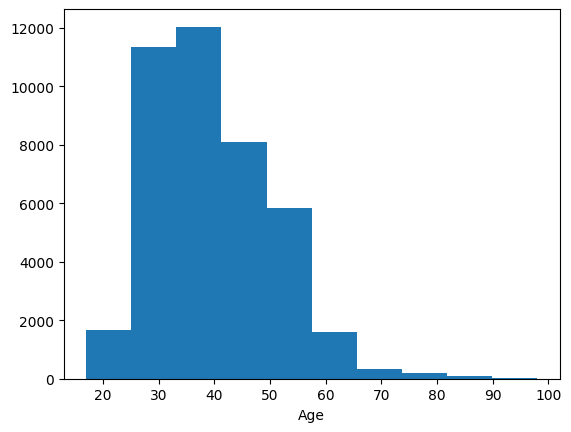

In [ ]:
plt.hist(datos_filtrados_age['age'])
plt.xlabel('Age')
plt.show()


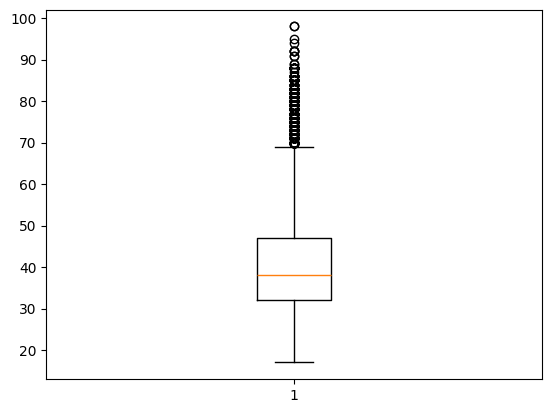

In [ ]:
plt.boxplot(datos_filtrados_age['age'])
plt.show()

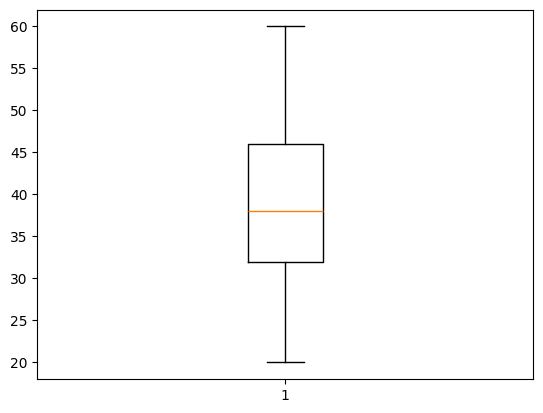

In [ ]:
datosor = z_score(datos_filtrados_age,'age')
plt.boxplot(datosor['age'])
plt.show()


###Duration

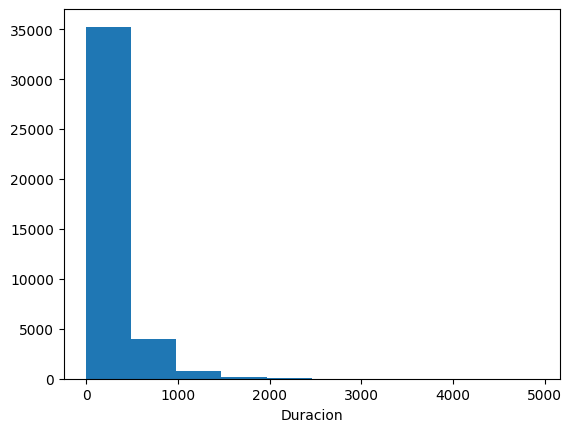

In [ ]:
plt.hist(datosor['duration'])
plt.xlabel('Duracion')
plt.show()

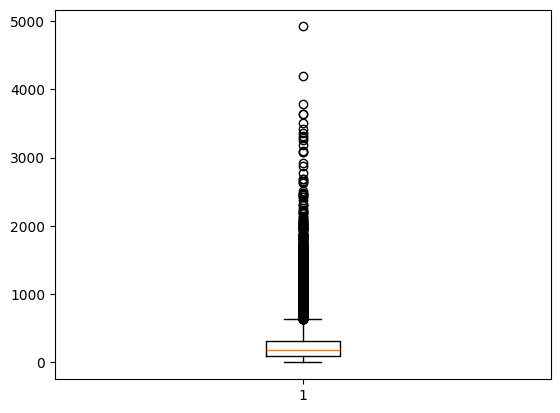

In [ ]:
plt.boxplot(datosor['duration'])
plt.show()

<ipython-input-326-0ee5cd5e05dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna+ 'z'] = (df[columna] - df[columna].mean())/df[columna].std()


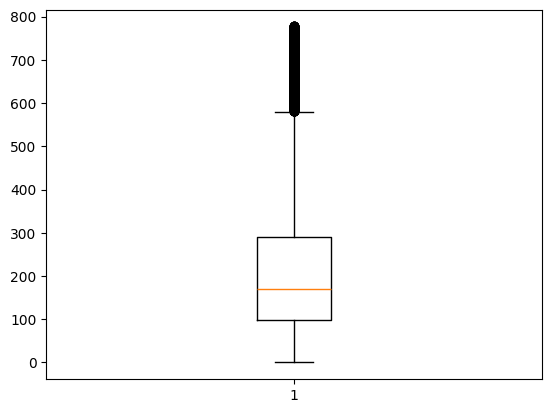

In [ ]:
datosor = z_score(datosor,'duration')
plt.boxplot(datosor['duration'])
plt.show()

###Campaing


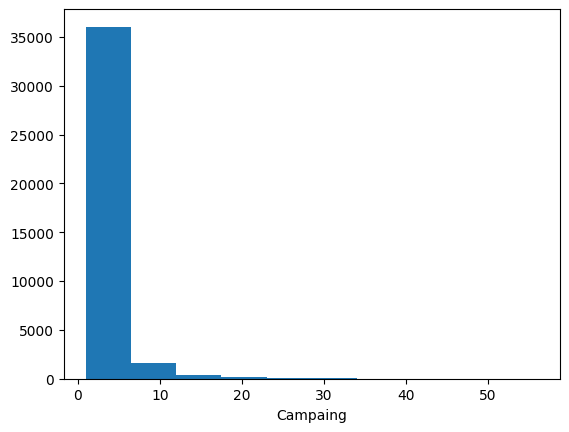

In [ ]:
plt.hist(datosor['campaign'])
plt.xlabel('Campaing')
plt.show()

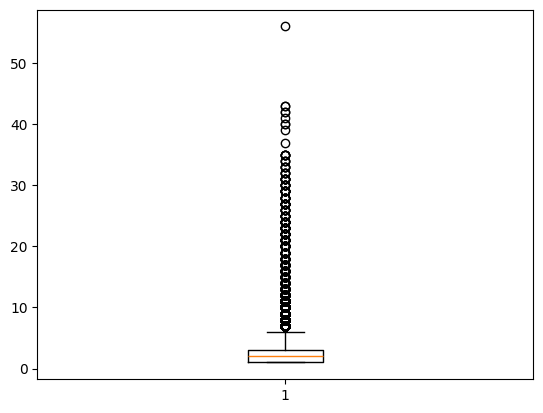

In [ ]:
plt.boxplot(datosor['campaign'])
plt.show()


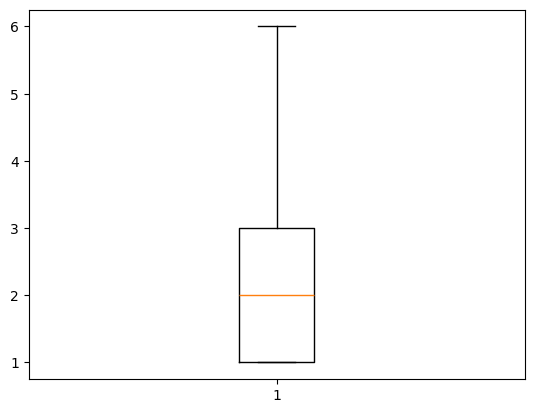

In [ ]:
datosor = outliers_RIC(datosor,'campaign')
plt.boxplot(datosor['campaign'])
plt.show()

###previous

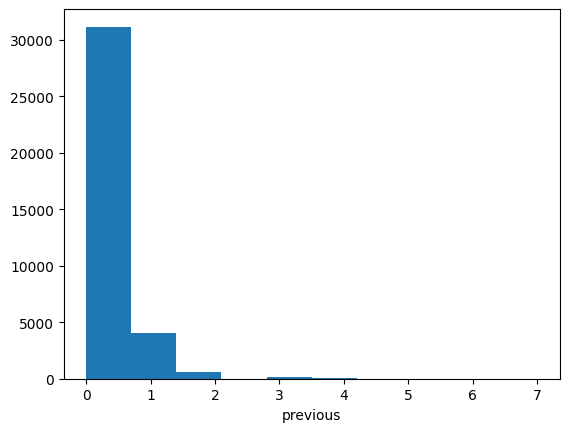

In [ ]:
plt.hist(datosor['previous'])
plt.xlabel('previous')
plt.show()

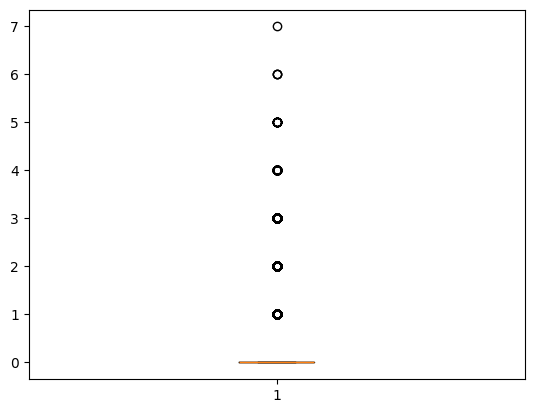

In [ ]:
plt.boxplot(datosor['previous'])
plt.show()


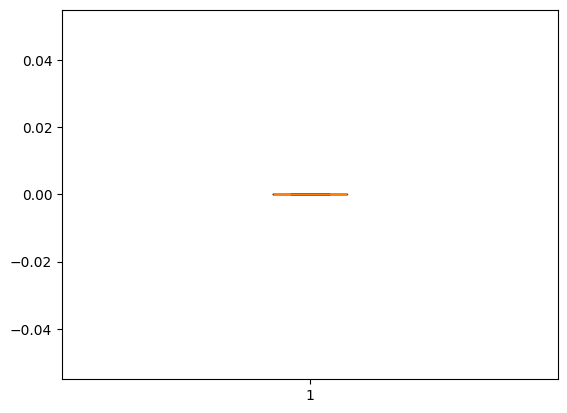

In [ ]:
datosor = outliers_RIC(datosor,'previous')
plt.boxplot(datosor['previous'])
plt.show()

###emp.var.rate


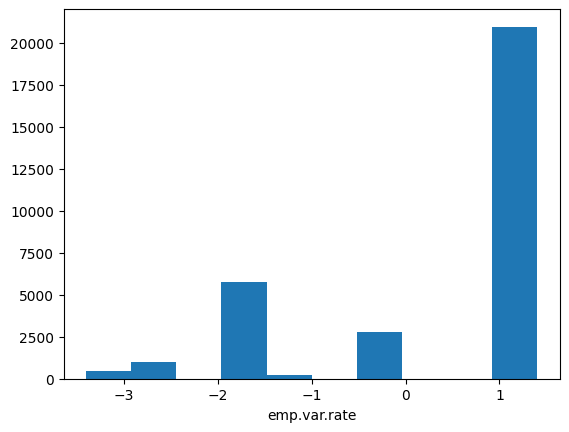

In [ ]:
plt.hist(datosor['emp.var.rate'])
plt.xlabel('emp.var.rate')
plt.show()

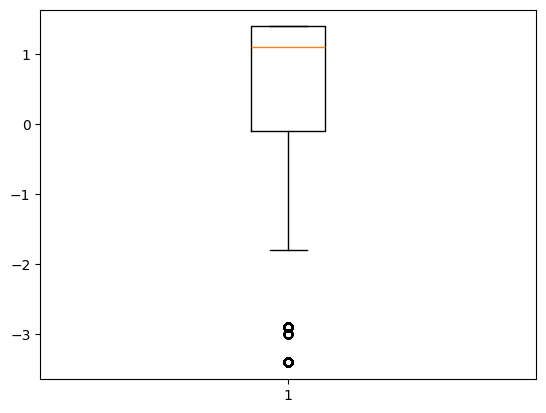

In [ ]:
plt.boxplot(datosor['emp.var.rate'])
plt.show()

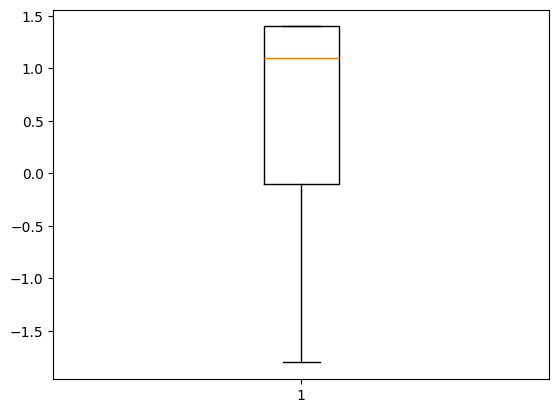

In [ ]:
datosor = outliers_RIC(datosor,'emp.var.rate')
plt.boxplot(datosor['emp.var.rate'])
plt.show()

###cons.price.idx

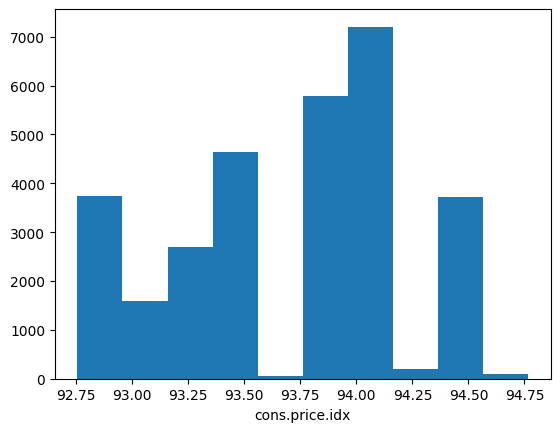

In [ ]:
plt.hist(datosor['cons.price.idx'])
plt.xlabel('cons.price.idx')
plt.show()

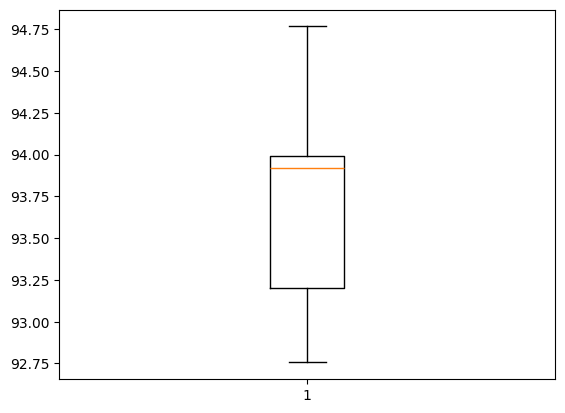

In [ ]:
plt.boxplot(datosor['cons.price.idx'])
plt.show()

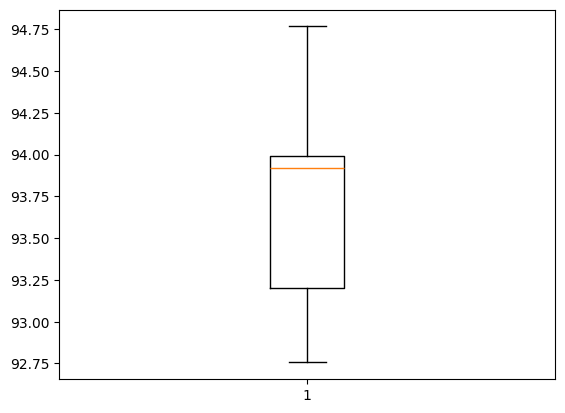

In [ ]:
datosor = outliers_RIC(datosor,'cons.price.idx')
plt.boxplot(datosor['cons.price.idx'])
plt.show()

###cons.conf.idx

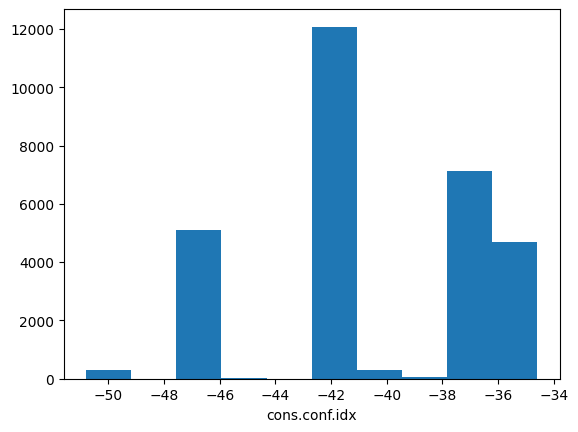

In [ ]:
plt.hist(datosor['cons.conf.idx'])
plt.xlabel('cons.conf.idx')
plt.show()

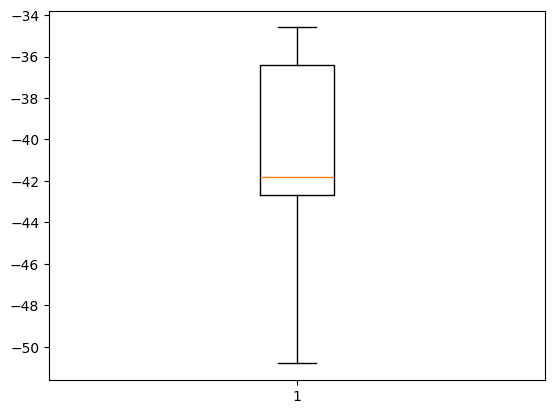

In [ ]:
plt.boxplot(datosor['cons.conf.idx'])
plt.show()

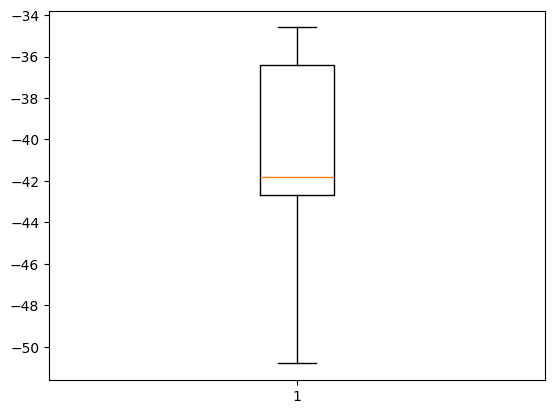

In [ ]:
datosor = outliers_RIC(datosor,'cons.conf.idx')
plt.boxplot(datosor['cons.conf.idx'])
plt.show()

###euribor3m

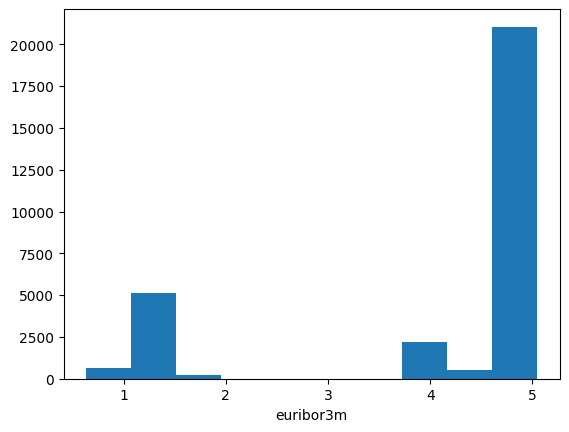

In [ ]:
plt.hist(datosor['euribor3m'])
plt.xlabel('euribor3m')
plt.show()

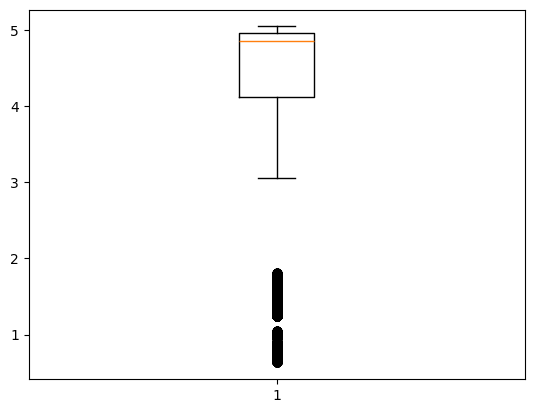

In [ ]:
plt.boxplot(datosor['euribor3m'])
plt.show()

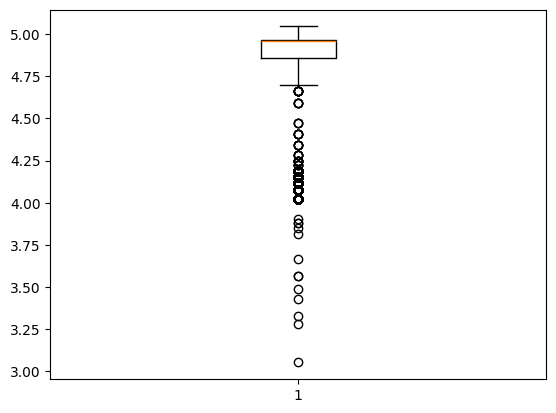

In [ ]:
datosor = outliers_RIC(datosor,'euribor3m')
plt.boxplot(datosor['euribor3m'])
plt.show()

###nr.employed

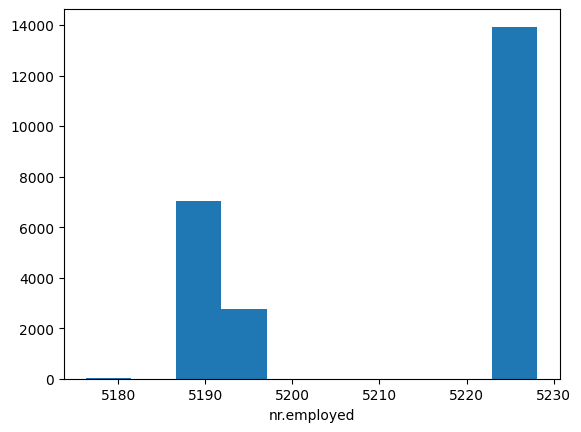

In [ ]:
plt.hist(datosor['nr.employed'])
plt.xlabel('nr.employed')
plt.show()

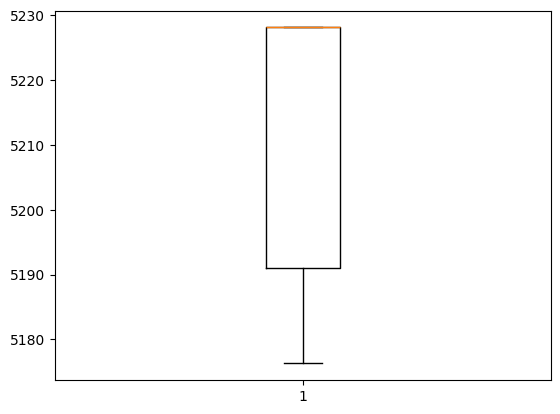

In [ ]:
plt.boxplot(datosor['nr.employed'])
plt.show()

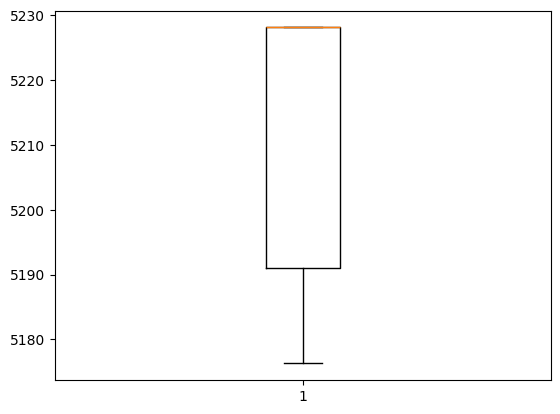

In [ ]:
datosor = outliers_RIC(datosor,'nr.employed')
plt.boxplot(datosor['nr.employed'])
plt.show()

#Valores Redundates


In [ ]:
datosor.drop('previous', axis=1, inplace=True) ##Tras la limpieza obtubimos valores nulos

In [ ]:
matriz_covarianza = datosor[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].cov()
matriz_covarianza

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,84.397377,-17.222246,0.170775,-0.075911,-0.118470,1.715414,-0.042186,-2.943977
duration,-17.222246,25240.204506,-5.697718,0.498153,2.014584,0.153548,0.448275,-120.999426
campaign,0.170775,-5.697718,1.714923,0.065088,0.031065,-0.063473,0.031267,1.996025
emp.var.rate,-0.075911,0.498153,0.065088,0.219072,0.099471,0.198438,0.119351,5.058252
cons.price.idx,-0.118470,2.014584,0.031065,0.099471,0.146571,-0.219741,0.055703,0.871713
cons.conf.idx,1.715414,0.153548,-0.063473,0.198438,-0.219741,9.039321,0.181568,-22.412264
euribor3m,-0.042186,0.448275,0.031267,0.119351,0.055703,0.181568,0.068904,2.329677
nr.employed,-2.943977,-120.999426,1.996025,5.058252,0.871713,-22.412264,2.329677,312.123585


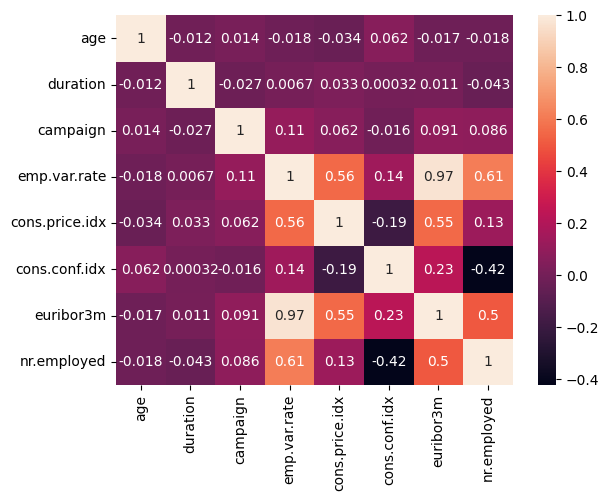

In [ ]:
sns.heatmap(datosor[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].corr(), annot=True)
plt.show()

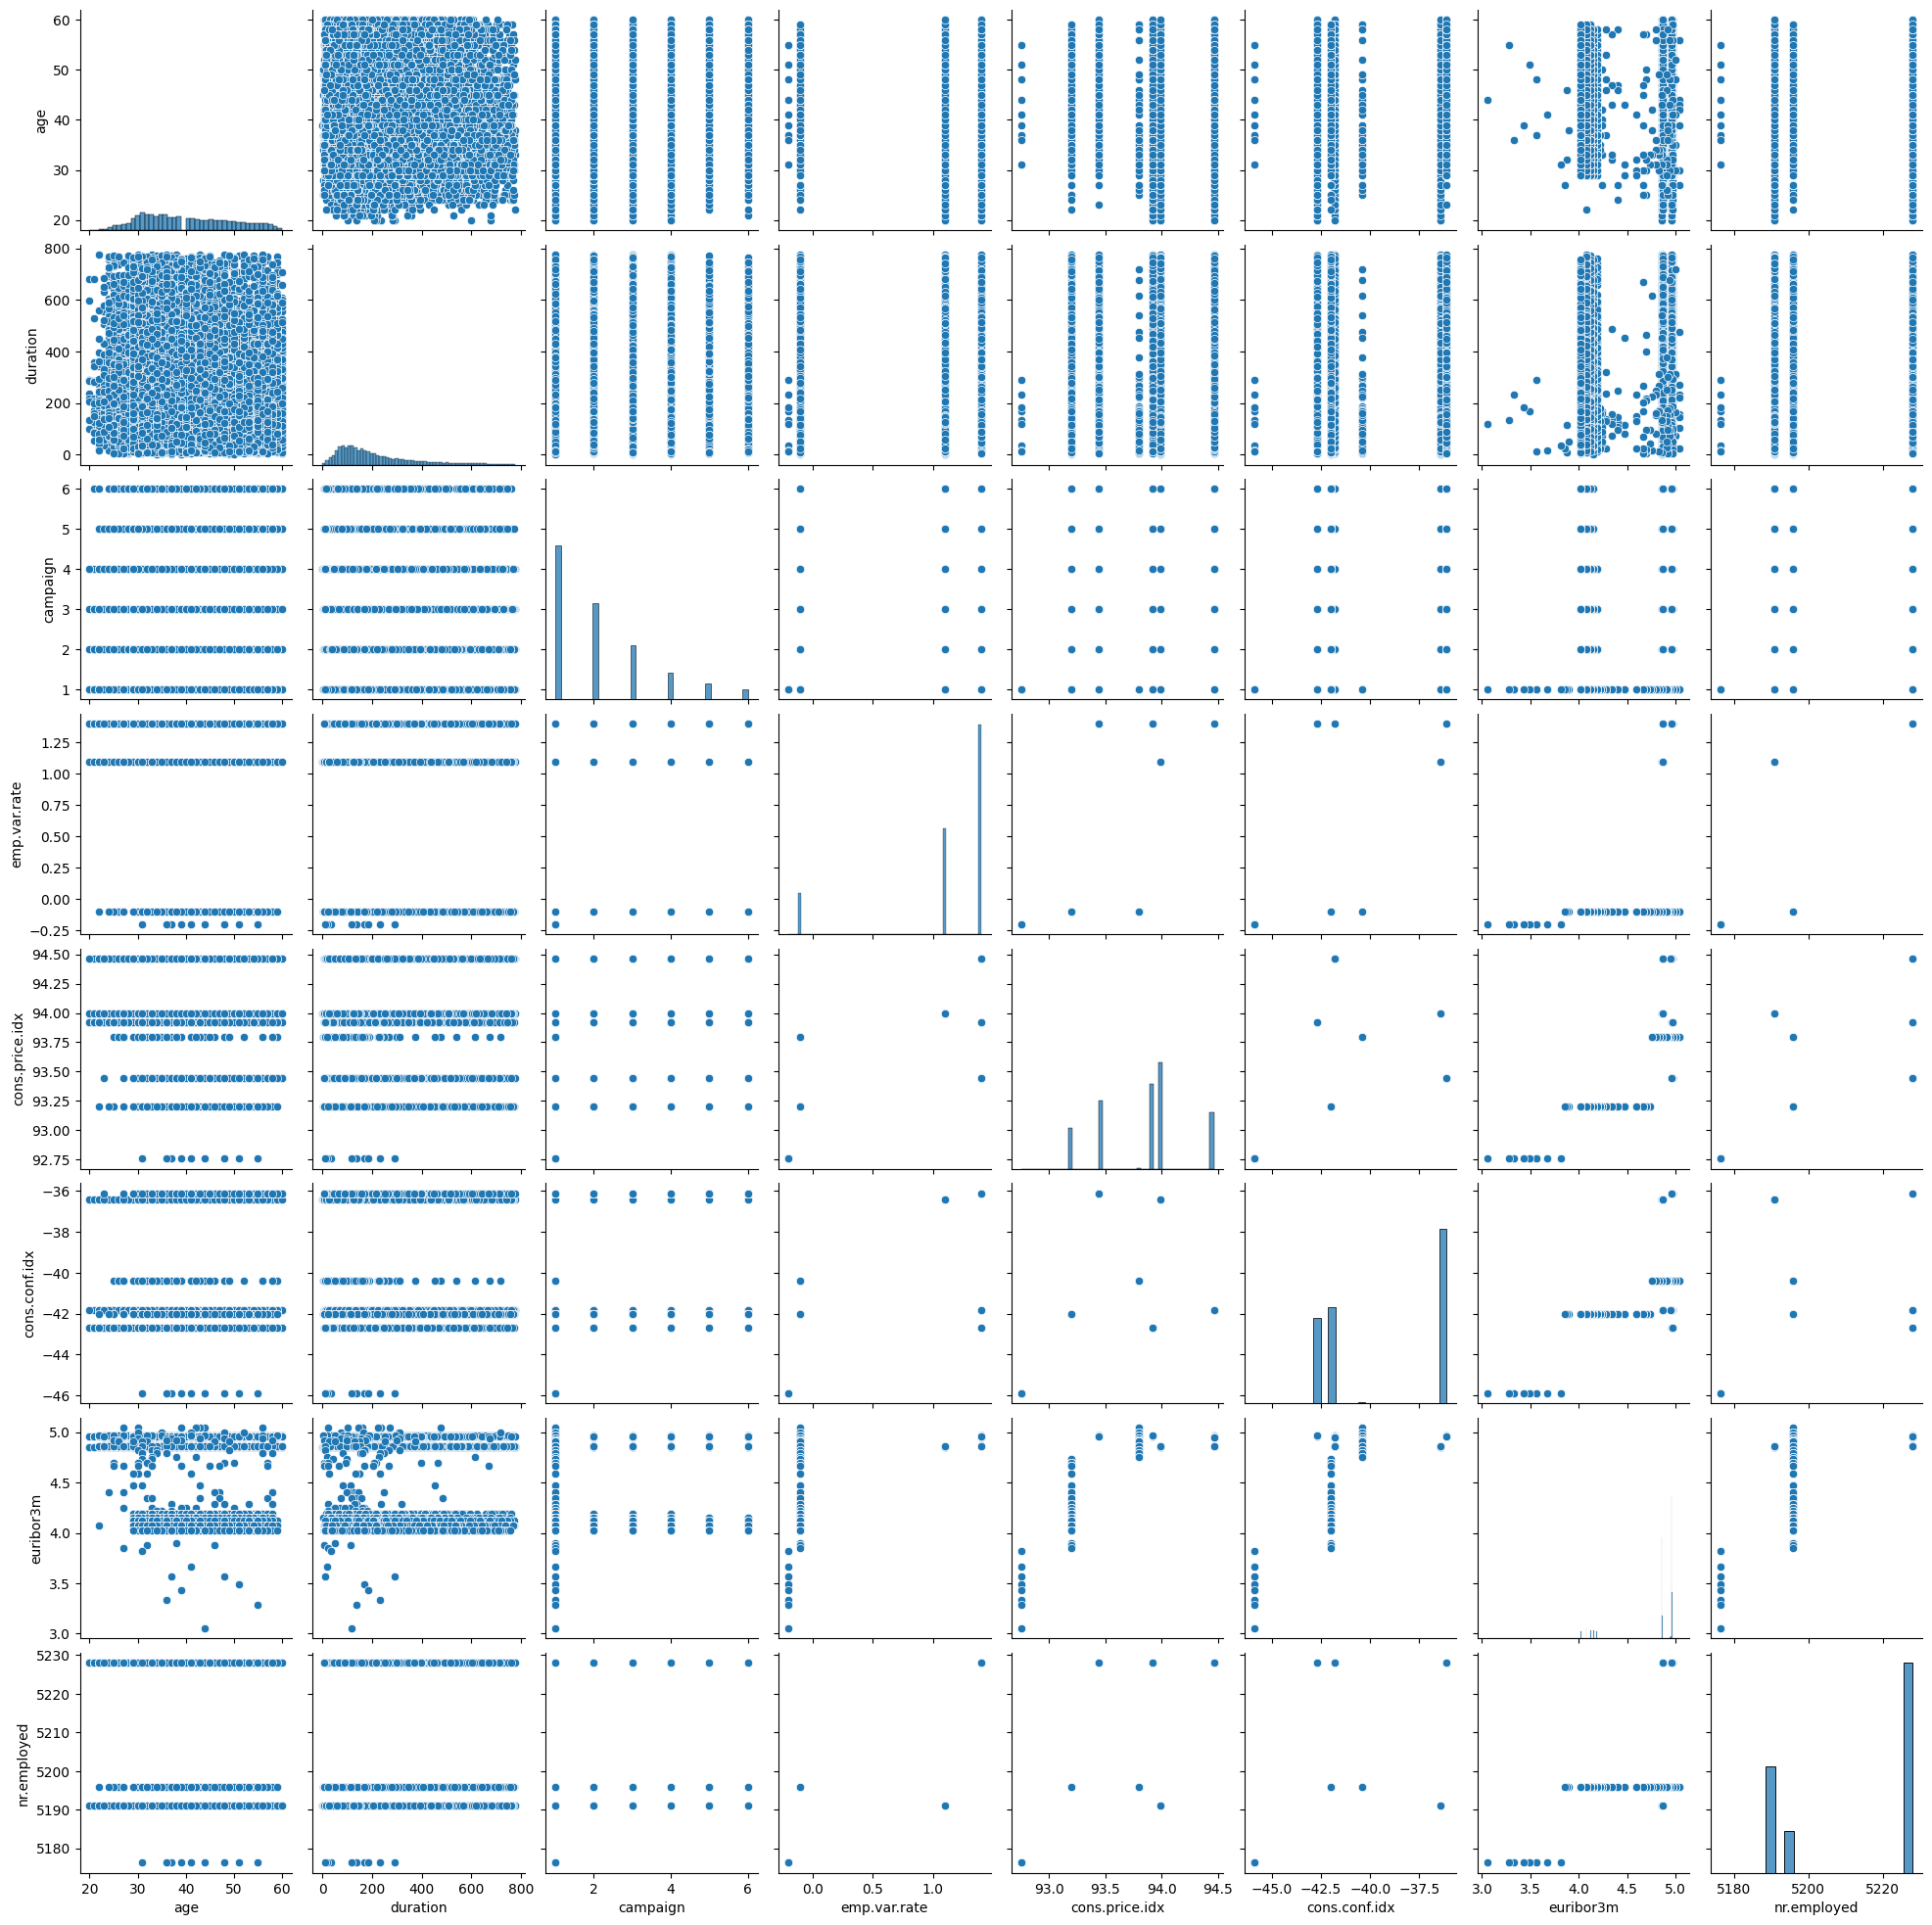

In [ ]:
sns.pairplot(datosor[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])
plt.show()

In [ ]:
#Correlacíon de Kendal
correlacion_kendall = datosor[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].corr(method='kendall')
correlacion_kendall

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.012355,0.006934,-0.020699,-0.007454,0.059323,-0.000971,-0.019373
duration,-0.012355,1.000000,-0.016636,-0.031957,0.038110,-0.009812,-0.033751,-0.058866
campaign,0.006934,-0.016636,1.000000,0.085775,0.043869,-0.002936,0.054409,0.056318
emp.var.rate,-0.020699,-0.031957,0.085775,1.000000,0.063321,-0.041683,0.757485,0.751727
cons.price.idx,-0.007454,0.038110,0.043869,0.063321,1.000000,-0.064074,-0.143375,-0.145770
cons.conf.idx,0.059323,-0.009812,-0.002936,-0.041683,-0.064074,1.000000,0.066887,-0.250774
euribor3m,-0.000971,-0.033751,0.054409,0.757485,-0.143375,0.066887,1.000000,0.574114
nr.employed,-0.019373,-0.058866,0.056318,0.751727,-0.145770,-0.250774,0.574114,1.000000


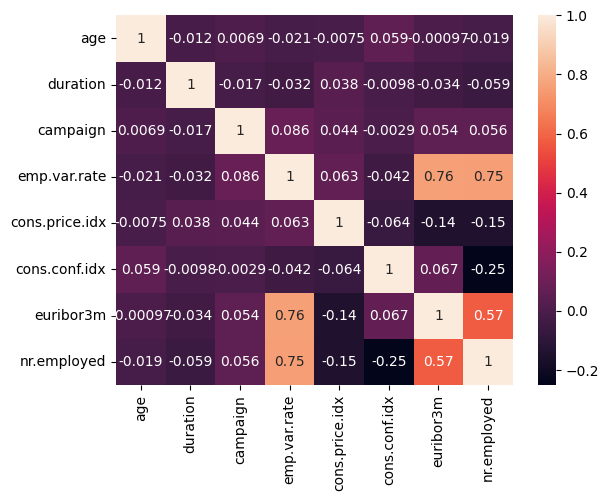

In [ ]:
sns.heatmap(correlacion_kendall, annot=True)
plt.show()

In [ ]:
#Correlacion de spearman
correlacion_spearman = datosor[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].corr(method='spearman')
correlacion_spearman


,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.018118,0.009113,-0.026238,-0.009491,0.079434,-0.002212,-0.023961
duration,-0.018118,1.000000,-0.022346,-0.040182,0.050740,-0.011908,-0.049930,-0.075222
campaign,0.009113,-0.022346,1.000000,0.096571,0.053461,-0.003790,0.070091,0.064285
emp.var.rate,-0.026238,-0.040182,0.096571,1.000000,0.105035,-0.081925,0.871410,0.889490
cons.price.idx,-0.009491,0.050740,0.053461,0.105035,1.000000,-0.011206,-0.130263,-0.200204
cons.conf.idx,0.079434,-0.011908,-0.003790,-0.081925,-0.011206,1.000000,0.141672,-0.255650
euribor3m,-0.002212,-0.049930,0.070091,0.871410,-0.130263,0.141672,1.000000,0.779646
nr.employed,-0.023961,-0.075222,0.064285,0.889490,-0.200204,-0.255650,0.779646,1.000000


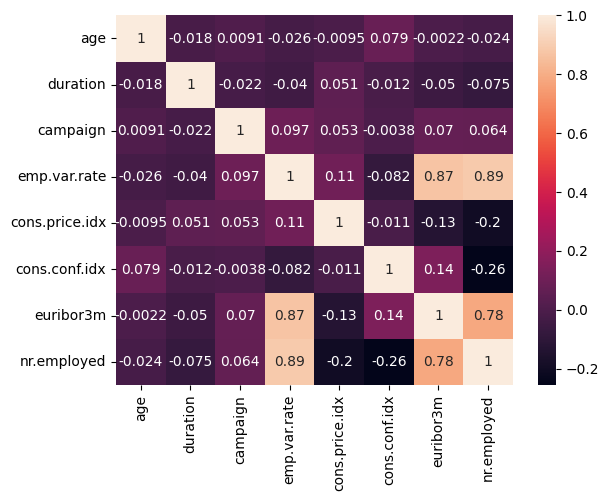

In [ ]:
sns.heatmap(correlacion_spearman, annot=True)
plt.show()

#Regresion lineal


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

variables = []
coeficientes = []

variables_continuas = ['age', 'duration', 'campaign', 'emp.var.rate',
                       'cons.price.idx', 'cons.conf.idx']

# Create a DataFrame with the continuous variables
df_continuas = datosor[variables_continuas]

for variable in variables_continuas:
    y = df_continuas[variable]  # Access the column using the variable name
    X = df_continuas.drop(variable, axis=1)  # Drop the target variable from features
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Assuming 'x' should be 'X' for prediction:
    coeficientes.append(modelo.score(X, y))
    variables.append(variable)

resumen_de_datos = pd.DataFrame({'variable': variables, 'coeficientes': coeficientes})
resumen_de_datos

,variable,coeficientes
0,age,0.005078
1,duration,0.002332
2,campaign,0.013406
3,emp.var.rate,0.377133
4,cons.price.idx,0.382989
5,cons.conf.idx,0.128753


In [ ]:
datosor.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,education,contacted,agez,durationz
0,56,housemaid,married,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,no,basic,no,1.533016,0.012104
1,57,services,married,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,no,highschool,no,1.628973,-0.418818
2,37,services,married,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,no,highschool,no,-0.290182,-0.122559
3,40,admin,married,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,no,basic,no,-0.002309,-0.411123
4,56,services,married,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,no,highschool,no,1.533016,0.189090


In [ ]:
#Iteracion 1
datosor = datosor.drop(['nr.employed','euribor3m','emp.var.rate'], axis=1)


##Informacion Mutua

In [ ]:
from sklearn.feature_selection import mutual_info_classif
datos_categoricos = datosor[['job',
  'marital',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'y',
  'education']]



In [ ]:
datosor.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,y,education,contacted,agez,durationz
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,nonexistent,93.994,-36.4,no,basic,no,1.533016,0.012104
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,nonexistent,93.994,-36.4,no,highschool,no,1.628973,-0.418818
2,37,services,married,no,yes,no,telephone,may,mon,226,1,nonexistent,93.994,-36.4,no,highschool,no,-0.290182,-0.122559
3,40,admin,married,no,no,no,telephone,may,mon,151,1,nonexistent,93.994,-36.4,no,basic,no,-0.002309,-0.411123
4,56,services,married,no,no,yes,telephone,may,mon,307,1,nonexistent,93.994,-36.4,no,highschool,no,1.533016,0.189090


In [ ]:
import pandas as pd
from sklearn.metrics import mutual_info_score

df_cuadratico = pd.DataFrame(index=datos_categoricos.columns, columns=datos_categoricos.columns)

In [ ]:
import pandas as pd
from sklearn.metrics import mutual_info_score # Make sure to import the function in the current cell

df_cuadratico = pd.DataFrame(index=datos_categoricos.columns, columns=datos_categoricos.columns)

for x in datos_categoricos.columns:
  for y in datos_categoricos.columns:
    informacion_mutua= mutual_info_score(datos_categoricos[x], datos_categoricos[y])
    df_cuadratico.loc[x,y] = informacion_mutua
df_cuadratico

,job,marital,default,housing,loan,contact,month,day_of_week,y,education
job,2.020119,0.031421,0.024476,0.000637,0.000526,0.0128,0.047403,0.001403,0.000287,0.397767
marital,0.031421,0.891328,0.00895,0.000072,0.000097,0.001522,0.005447,0.000795,0.00019,0.017731
default,0.024476,0.00895,0.575593,0.000127,0.000118,0.003671,0.011527,0.000432,0.00024,0.027068
housing,0.000637,0.000072,0.000127,0.791627,0.117448,0.00454,0.006055,0.000385,0.00003,0.000296
loan,0.000526,0.000097,0.000118,0.117448,0.535724,0.000647,0.000988,0.000296,0.000055,0.000275
contact,0.0128,0.001522,0.003671,0.00454,0.000647,0.693048,0.534416,0.002768,0.000534,0.014844
month,0.047403,0.005447,0.011527,0.006055,0.000988,0.534416,1.57474,0.007411,0.00611,0.038734
day_of_week,0.001403,0.000795,0.000432,0.000385,0.000296,0.002768,0.007411,1.608535,0.000137,0.000833
y,0.000287,0.00019,0.00024,0.00003,0.000055,0.000534,0.00611,0.000137,0.119777,0.000222
education,0.397767,0.017731,0.027068,0.000296,0.000275,0.014844,0.038734,0.000833,0.000222,1.46086


##Redundancia de Theil

In [ ]:
# Implementación (simplificada)
def redundancia_theil(x, y):
  from collections import Counter

  # Calcula las probabilidades conjuntas y marginales
  c = Counter(zip(x, y))
  n = len(x)
  p_xy = {(xx, yy): count / n for (xx, yy), count in c.items()}
  p_x = Counter(x)
  p_y = Counter(y)

  # Calcula la redundancia de Theil
  theil_u = 0
  for (xx, yy), p in p_xy.items():
    theil_u += p * np.log(p / (p_x[xx] / n * p_y[yy] / n))

  return theil_u / (np.sqrt(sum([(p_x[xx] / n) * np.log(p_x[xx] / n) ** 2 for xx in p_x])) *
                    np.sqrt(sum([(p_y[yy] / n) * np.log(p_y[yy] / n) ** 2 for yy in p_y])))

##Coeficiente de Cramer

In [ ]:
# prompt: Genera el codigo para el coeficente de cramer

import pandas as pd
import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Handle the case where r or k is 1
    if r == 1 or k == 1:
        return 0
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    # Handle the case where rcorr or kcorr is 0 or negative
    if rcorr <= 0 or kcorr <= 0:
        return 0
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of categorical features
cramer_matrix = pd.DataFrame(index=datos_categoricos.columns, columns=datos_categoricos.columns)

for col1 in datos_categoricos.columns:
    for col2 in datos_categoricos.columns:
        cramer_matrix.loc[col1, col2] = cramers_v(datos_categoricos[col1], datos_categoricos[col2])

cramer_matrix

,job,marital,default,housing,loan,contact,month,day_of_week,y,education
job,1.0,0.146961,0.156845,0.013461,0.008561,0.158018,0.123612,0.01521,0.012782,0.417683
marital,0.146961,1.0,0.091828,0.0,0.0,0.053991,0.058365,0.019029,0.022111,0.106358
default,0.156845,0.091828,1.0,0.006704,0.005419,0.084852,0.099418,0.017083,0.019218,0.16565
housing,0.013461,0.0,0.006704,1.0,0.70795,0.094738,0.076095,0.014699,0.0,0.009049
loan,0.008561,0.0,0.005419,0.70795,1.0,0.034639,0.027649,0.011338,0.004451,0.007638
contact,0.158018,0.053991,0.084852,0.094738,0.034639,0.999916,0.906331,0.073127,0.031682,0.171048
month,0.123612,0.058365,0.099418,0.076095,0.027649,0.906331,1.0,0.05795,0.207795,0.123388
day_of_week,0.01521,0.019029,0.017083,0.014699,0.011338,0.073127,0.05795,1.0,0.010168,0.013549
y,0.012782,0.022111,0.019218,0.0,0.004451,0.031682,0.207795,0.010168,0.999161,0.016727
education,0.417683,0.106358,0.16565,0.009049,0.007638,0.171048,0.123388,0.013549,0.016727,1.0


In [ ]:
from scipy.stats import chi2_contingency

# Crea una tabla de contingencia entre dos variables categóricas
#tabla_contingencia = pd.crosstab(datos_categoricos['variable1'], datos_categoricos['variable2'])

# Calcula el coeficiente de Cramer
#chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
#n = tabla_contingencia.sum().sum()
#phi2 = chi2 / n
#v_cramer = np.sqrt(phi2 / min(tabla_contingencia.shape[0] - 1, tabla_contingencia.shape[1] - 1))

# Imprime el coeficiente de Cramer
#print(v_cramer)

KeyError: 'variable1'

#Valores atípicos

##Distancia de Mahalanobis

In [ ]:
# Importamos la libreria que ocuparemos
from scipy.spatial import distance

In [ ]:

import numpy as np
datos_numericos = datosor.select_dtypes(include=np.number)


In [ ]:
# Calculamos la matriz de covarianza inversa
cov_inv = np.linalg.inv(datos_numericos.cov())

In [ ]:
# Calculamos la distancia de Mahalanobis para cada punto de datos
centroide = datos_numericos.mean()
distancias_mahalanobis = datos_numericos.apply(lambda fila: distance.mahalanobis(fila,
                                                                                 centroide,
                                                                                 cov_inv), axis=1)

In [ ]:
# Añadimos la distancia de Mahalanobis como una nueva columna al Dataframe
datosor['distancia_mahalanobis'] = distancias_mahalanobis

In [ ]:
# Identificamos los valores atipicos
umbral = np.percentile(distancias_mahalanobis, 95)  # Umbral del percentil 95
valores_atipicos = datosor[datosor['distancia_mahalanobis'] > umbral]
valores_atipicos

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,y,education,contacted,agez,durationz,distancia_mahalanobis
46,57,admin,married,no,yes,yes,telephone,may,mon,616,1,nonexistent,93.994,-36.4,no,universitydegree,no,1.628973,1.377973,3.575305
195,48,blue_collar,married,no,yes,no,telephone,may,mon,717,1,nonexistent,93.994,-36.4,no,basic,no,0.765353,1.766573,3.502425
243,34,services,single,no,no,no,telephone,may,mon,730,2,nonexistent,93.994,-36.4,no,basic,no,-0.578055,1.816590,3.413790
249,33,services,single,no,no,no,telephone,may,mon,702,1,nonexistent,93.994,-36.4,no,highschool,no,-0.674013,1.708860,3.460482
296,49,blue_collar,divorced,no,no,yes,telephone,may,mon,742,2,nonexistent,93.994,-36.4,no,highschool,no,0.861311,1.862761,3.767956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27685,51,blue_collar,married,no,yes,yes,telephone,dec,mon,170,1,nonexistent,92.756,-45.9,no,basic,no,1.053227,-0.338020,4.239441
27686,39,technician,married,no,yes,no,telephone,dec,tue,183,1,nonexistent,92.756,-45.9,no,professionalcourse,no,-0.098267,-0.288002,4.053797
27687,36,blue_collar,married,no,yes,no,cellular,dec,thu,234,1,nonexistent,92.756,-45.9,no,highschool,no,-0.386140,-0.091779,4.076869
27688,55,unemployed,divorced,no,no,no,telephone,dec,fri,136,1,nonexistent,92.756,-45.9,no,professionalcourse,no,1.437058,-0.468836,4.420370


In [ ]:
datos_sin_atipicos = datosor[datosor['distancia_mahalanobis'] <= umbral]

# Se restablece el índice
datosor = datos_sin_atipicos.reset_index(drop=True)

datosor

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,y,education,contacted,agez,durationz,distancia_mahalanobis
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,nonexistent,93.994,-36.4,no,basic,no,1.533016,0.012104,2.238985
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,nonexistent,93.994,-36.4,no,highschool,no,1.628973,-0.418818,2.269311
2,37,services,married,no,yes,no,telephone,may,mon,226,1,nonexistent,93.994,-36.4,no,highschool,no,-0.290182,-0.122559,1.478100
3,40,admin,married,no,no,no,telephone,may,mon,151,1,nonexistent,93.994,-36.4,no,basic,no,-0.002309,-0.411123,1.486343
4,56,services,married,no,no,yes,telephone,may,mon,307,1,nonexistent,93.994,-36.4,no,highschool,no,1.533016,0.189090,2.259632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22541,32,admin,married,no,no,no,cellular,nov,fri,219,2,nonexistent,93.200,-42.0,no,highschool,no,-0.769971,-0.149492,2.281800
22542,38,technician,married,no,yes,yes,telephone,nov,wed,49,1,nonexistent,93.200,-42.0,no,professionalcourse,no,-0.194224,-0.803570,2.508424
22543,32,unemployed,single,no,no,yes,telephone,nov,thu,114,1,nonexistent,93.200,-42.0,no,highschool,no,-0.769971,-0.553481,2.474994
22544,46,entrepreneur,single,no,yes,no,telephone,nov,thu,8,1,nonexistent,93.200,-42.0,no,professionalcourse,no,0.573438,-0.961318,2.639964


#Prueba Chi-Cuadrada

###Prueba de independecia

In [ ]:
from scipy.stats import chi2_contingency

# Selecciona las dos variables categóricas
variable1 = 'education'
variable2 = 'job'

# Crea una tabla de contingencia
tabla_contingencia = pd.crosstab(datosor[variable1], datosor[variable2])

# Realiza la prueba de independencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprime los resultados
print(f"Estadística de chi-cuadrada: {chi2}")
print(f"Valor p: {p}")

# Si p < 0.05, rechaza la hipótesis nula de independencia
alpha = 0.05

if p < alpha:
    print("Existe una asociación significativa entre las variables.")
else:
    print("No existe una asociación significativa entre las variables.")

Estadística de chi-cuadrada: 19850.040998154975
Valor p: 0.0
Existe una asociación significativa entre las variables.


###Prueba de Bondad y Ajuste


In [ ]:
import pandas as pd
from scipy.stats import chisquare

# 1. Seleccionar la variable categórica
variable = "education"

# 2. Definir la distribución esperada (uniforme en este caso)
# Se asume que cada categoría tiene la misma probabilidad

# 3. Calcular las frecuencias observadas y esperadas
observadas = pd.DataFrame(datosor[variable].value_counts())
num_categorias = len(observadas)
total_observaciones = observadas['count'].sum()
esperadas = pd.DataFrame([total_observaciones / num_categorias] * num_categorias,
                         index=observadas.index, columns=[variable])

# 4. Realizar la prueba de chi-cuadrada
chi2_statistic, p_value = chisquare(observadas['count'], f_exp=esperadas[variable])

# Imprimir los resultados
print(f"Variable: {variable}")
print(f"Frecuencias observadas:\n{observadas}\n")
print(f"Frecuencias esperadas:\n{esperadas}\n")
print(f"Estadística de chi-cuadrada: {chi2_statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print(f"Se rechaza la hipótesis nula. La distribución de {variable} no se ajusta a una distribución uniforme.")
else:
    print(f"No se rechaza la hipótesis nula. No hay suficiente evidencia para sugerir que la distribución de {variable} no se ajusta a una distribución uniforme.")

Variable: education
Frecuencias observadas:
                    count
education                
basic                7150
universitydegree     6397
highschool           5062
professionalcourse   2986
unknown               942
illiterate              9

Frecuencias esperadas:
                      education
education                      
basic               3757.666667
universitydegree    3757.666667
highschool          3757.666667
professionalcourse  3757.666667
unknown             3757.666667
illiterate          3757.666667

Estadística de chi-cuadrada: 11377.07123214761
Valor p: 0.0
Se rechaza la hipótesis nula. La distribución de education no se ajusta a una distribución uniforme.


#Caras de Chernof


In [ ]:
!pip install carat
import carat
print(carat.__version__)

v0.1.6


In [ ]:
# prompt: define la variable de datos_categoricos del set de datos datosor

datos_categoricos = datosor[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'education']]


In [ ]:
# Importando chernoff_face desde carat.
from carat import *
# Seleccionando una muestra pequeña de los datos
muestra_datos = datos_categoricos.sample(20)
muestra_datos

,job,marital,default,housing,loan,contact,month,day_of_week,poutcome,y,education
21941,self_employed,single,no,yes,yes,cellular,nov,thu,nonexistent,no,highschool
10393,blue_collar,married,unknown,no,no,telephone,jul,thu,nonexistent,no,basic
9666,admin,single,no,no,no,telephone,jun,thu,nonexistent,no,highschool
9237,services,single,no,yes,no,telephone,jun,tue,nonexistent,no,basic
8766,admin,single,unknown,no,no,telephone,jun,thu,nonexistent,no,universitydegree
16821,admin,married,no,no,no,cellular,aug,mon,nonexistent,no,universitydegree
8926,blue_collar,married,no,no,no,telephone,jun,mon,nonexistent,no,basic
20656,admin,married,unknown,yes,no,cellular,nov,tue,nonexistent,no,universitydegree
19488,blue_collar,married,no,yes,no,cellular,aug,tue,nonexistent,no,basic
6085,services,married,no,yes,yes,telephone,may,wed,nonexistent,no,highschool


# PSA

In [ ]:
# prompt: Realiza el codigo para el analisis por PSA

import pandas as pd
import matplotlib.pyplot as plt
# Convert categorical variables to numerical using one-hot encoding
datos_encoded = pd.get_dummies(datosor, columns=categorical_features, drop_first=True)

# Separate features (X) and target (y)
X = datos_encoded.drop('y_yes', axis=1)  # Assuming 'y_yes' is the target variable after one-hot encoding
y = datos_encoded['y_yes']

# Calculate PSA (Principal Sensitivity Analysis)
# PSA is not a standard single function like PCA. It's a methodology.
# A common approach is to use logistic regression and analyze coefficients or feature importance.
# Let's use Logistic Regression coefficients as a simple indicator of sensitivity.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear') # Use liblinear for smaller datasets
model.fit(X_scaled, y)

# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame of features and their coefficients
psa_results = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})

# Sort features by the absolute value of their coefficients to see the most influential ones
psa_results['abs_coefficient'] = abs(psa_results['coefficient'])
psa_results = psa_results.sort_values(by='abs_coefficient', ascending=False)

print("Principal Sensitivity Analysis (using Logistic Regression Coefficients):")
print(psa_results)

# Visualize the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_coefficient', y='feature', data=psa_results.head(20)) # Display top 20
plt.title('Top 20 Features by Absolute Logistic Regression Coefficient (PSA)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Another perspective of PSA could involve analyzing the model's performance
# with subsets of features or by varying the sensitivity of the model's decision boundary.
# This is a more complex analysis and depends on the specific goal of sensitivity analysis.
# For a simple illustration, we've used the model coefficients as a proxy for feature sensitivity.


ValueError: could not convert string to float: 'no'

#EMS

#CLUSTERING

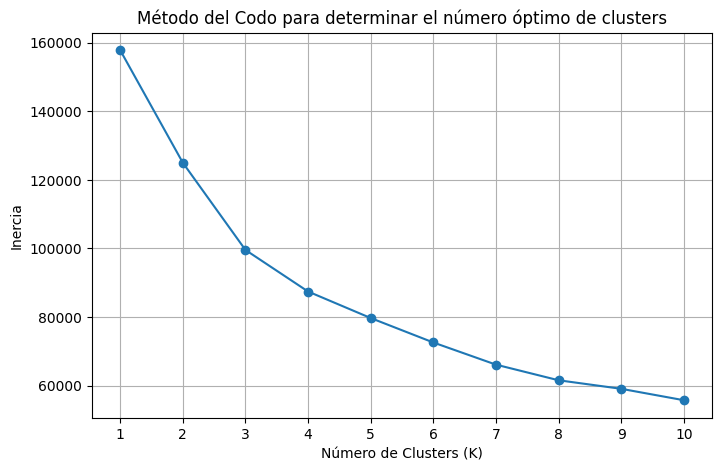

               age    duration  campaign  cons.price.idx  cons.conf.idx  \
cluster                                                                   
0        49.944909  152.456790  2.035842       93.825121     -39.084628   
1        38.920102  432.586769  1.933147       93.899979     -39.355416   
2        33.668377  143.889366  2.053358       93.857775     -39.441017   

             agez  durationz  
cluster                       
0        0.951983  -0.405518  
1       -0.105933   0.672287  
2       -0.609877  -0.438481  

Distribución de 'job' por Cluster:
job      admin  blue_collar  entrepreneur  housemaid  management  retired  \
cluster                                                                     
0         1551         1799           316        321         690      528   
1         1035         1147           170        112         293       79   
2         2981         2425           359        245         613       17   

job      self_employed  services  student  tech

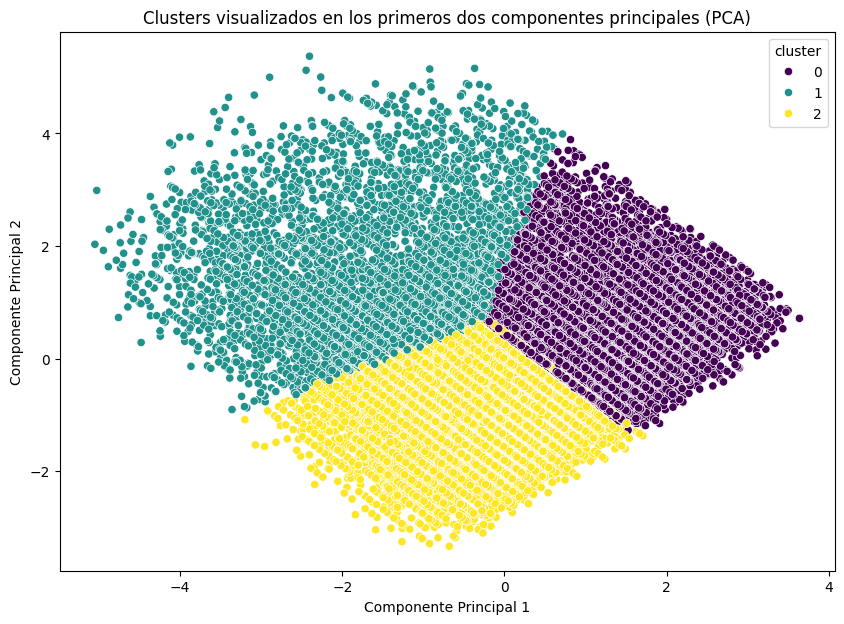

In [ ]:
# prompt: Realiza el clustering con los daros limpios

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'datosor' is your cleaned DataFrame from the previous steps

# Select the numerical columns for clustering
numerical_cols_for_clustering = datosor.select_dtypes(include=np.number).columns.tolist()

# Exclude any columns that were created during the analysis (like 'distancia_mahalanobis' or z-score columns)
# Adapt this list based on which columns you want to use for clustering
cols_to_exclude = ['distancia_mahalanobis']
numerical_cols_for_clustering = [col for col in numerical_cols_for_clustering if col not in cols_to_exclude and not col.endswith('_z')]

X_clustering = datosor[numerical_cols_for_clustering]

# Scale the numerical data
scaler_clustering = StandardScaler()
X_scaled_clustering = scaler_clustering.fit_transform(X_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to explicitly avoid warning
    kmeans.fit(X_scaled_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose a suitable number of clusters (e.g., if the elbow is at K=3 or 4)
# Let's assume the elbow is at K=3 for demonstration purposes. Adjust based on your plot.
optimal_k = 3

# Perform K-Means clustering with the chosen number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Set n_init to explicitly avoid warning
kmeans_optimal.fit(X_scaled_clustering)

# Add the cluster labels to the original DataFrame
datosor['cluster'] = kmeans_optimal.labels_

# Analyze the characteristics of each cluster
print(datosor.groupby('cluster')[numerical_cols_for_clustering].mean())

# You can also analyze the distribution of categorical variables within each cluster
# For example:
for cat_col in categorical_features:
    print(f"\nDistribución de '{cat_col}' por Cluster:")
    print(pd.crosstab(datosor['cluster'], datosor[cat_col]))

# Visualize the clusters (e.g., using PCA or selecting two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_clustering)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = datosor['cluster'] # Add cluster labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Clusters visualizados en los primeros dos componentes principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# You can also try visualizing with other pairs of features or dimensionality reduction techniques like t-SNE (though t-SNE is computationally more expensive).